<a href="https://colab.research.google.com/github/MatheusFortes7/Inteligencia-artificial/blob/main/jogarTenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [ ]:
csv_dir_treinamento = "/content/sample_data/weather.nominal.csv"
data_treino = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [ ]:
treinamento_classification = data_treino['play']
data_treino.drop(["play"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data_treino, columns=['outlook', 'temperature', 'humidity'])

In [ ]:
labelencoder =  preprocessing.LabelEncoder()
treinamento_dados['windy'] = labelencoder.fit_transform(treinamento_dados['windy'])

In [ ]:
from sklearn.model_selection import train_test_split
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.2)

In [ ]:
tree_weather = DecisionTreeClassifier(criterion="entropy")
tree_weather.fit(dataset_treino, dataset_treino_class)

DecisionTreeClassifier(criterion='entropy')

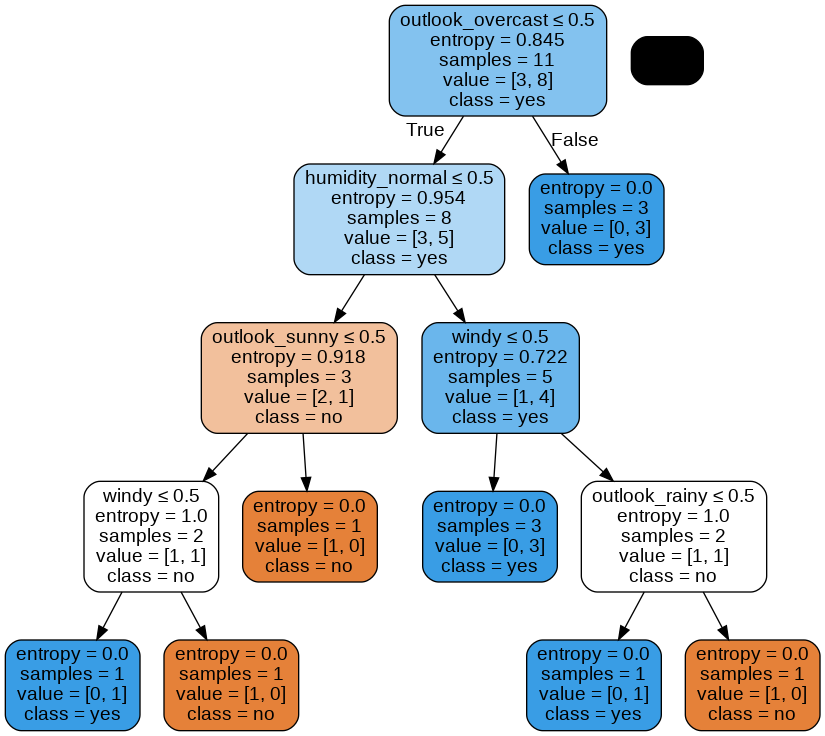

In [ ]:
dot_data = tree.export_graphviz(tree_weather, out_file=None,feature_names=dataset_treino.columns.values,class_names=treinamento_classification.unique(),filled=True, rounded=True,special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tenis.png')

from IPython.display import Image
Image(filename='tenis.png')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

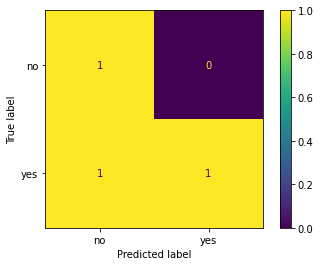

In [ ]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_weather.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['no','yes'])
cmd.plot(values_format="d")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print("Score = ", accuracy_score(dataset_teste_class, tree_weather.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, tree_weather.predict(dataset_teste)))

tn, fp, fn, tp = confusion_matrix(dataset_teste_class, tree_weather.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp)
fpr = fp / (tn + fp) 
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
print('verdadeiro negativo : ' + str(tnr))
print('falso positivo : ' + str(fpr))
print('falso negativo : ' + str(fnr))
print('verdadeiro positivo: ' + str(tpr))

Score =  1.0


              precision    recall  f1-score   support

          no       1.00      1.00      1.00         2
         yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

verdadeiro negativo : 1.0
falso positivo : 0.0
falso negativo : 0.0
verdadeiro positivo: 1.0
